In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from caimcaim import CAIMD
from scipy.stats import pearsonr

## CAIBAL with Iris Dataset

In [65]:
#dataset
dataset = pd.read_csv('datasets/irisDataset.csv')
Validation = pd.DataFrame(dataset['Species'])
dataset_to_cluster = dataset.drop(['Id','Species'], axis=1)
dataset_to_cluster

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Clustering with K-means

In [66]:
kmeans = KMeans(init='random', n_clusters=3, random_state=88)
dataset_w_clusterAtt = dataset_to_cluster.copy()
dataset_w_clusterAtt['cluster'] = kmeans.fit_predict(dataset_to_cluster)
print(pd.value_counts(dataset_w_clusterAtt["cluster"]))

0    62
1    50
2    38
Name: cluster, dtype: int64


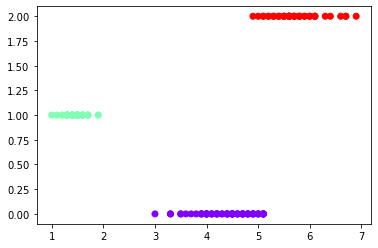

In [67]:
#ploting clusters
plt.scatter(dataset_w_clusterAtt['PetalLengthCm'],dataset_w_clusterAtt['cluster'], c=dataset_w_clusterAtt['cluster'], cmap='rainbow')

## Discretizing with CAIM

In [68]:
numAtt = dataset_to_cluster.copy()
clusterAtt = dataset_w_clusterAtt['cluster']
caim = CAIMD()
dataset_disc = caim.fit_transform(numAtt, clusterAtt)

Categorical []
# 0  GLOBAL CAIM  30.637118177869997
# 1  GLOBAL CAIM  20.114814814814817
# 2  GLOBAL CAIM  46.1764705882353
# 3  GLOBAL CAIM  40.77950461389024


In [69]:
#Finding cut points
disc_scheme = pd.DataFrame()
disc_scheme = caim.split_scheme
disc_scheme

{0: [4.3, 5.3, 6.2, 8.9],
 1: [2.0, 2.6, 3.3, 5.4],
 2: [1.0, 1.9, 5.2, 7.9],
 3: [0.1, 0.6, 1.9, 3.5]}

In [70]:
cluster = pd.DataFrame()
cluster = dataset_disc[dataset_w_clusterAtt['cluster'] == 1]
cluster

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.0,2.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,2.0,0.0,0.0
5,1.0,2.0,0.0,0.0
6,0.0,2.0,0.0,0.0
7,0.0,2.0,0.0,0.0
8,0.0,1.0,0.0,0.0
9,0.0,1.0,0.0,0.0


In [71]:
#
all_results = []
result_table = pd.DataFrame();
for (colName, colData) in cluster.items():
    counter_table = pd.crosstab(index=cluster[colName], columns='count', rownames=['ranges'])
    counter_table = counter_table/counter_table.sum()
    all_results.append(counter_table)
result_table = pd.concat(all_results, names=['Feature','range'], keys=cluster.columns)
result_table

col_0                count
Feature       range       
SepalLengthCm 0.0     0.78
              1.0     0.22
SepalWidthCm  0.0     0.02
              1.0     0.34
              2.0     0.64
PetalLengthCm 0.0     0.96
              1.0     0.04
PetalWidthCm  0.0     0.98
              1.0     0.02

In [72]:
feature_name = result_table.index[0][0]
feature_index = 0
for i_rt in range(result_table.index.size):
    if feature_name != result_table.index[i_rt][0]:
        feature_name = result_table.index[i_rt][0]
        feature_index+=1
    print(result_table.index[i_rt][0],': [',disc_scheme[feature_index][int(result_table.index[i_rt][1])],'-',disc_scheme[feature_index][int(result_table.index[i_rt][1])+1],'] -', result_table.values[i_rt])

SepalLengthCm : [ 4.3 - 5.3 ] - [0.78]
SepalLengthCm : [ 5.3 - 6.2 ] - [0.22]
SepalWidthCm : [ 2.0 - 2.6 ] - [0.02]
SepalWidthCm : [ 2.6 - 3.3 ] - [0.34]
SepalWidthCm : [ 3.3 - 5.4 ] - [0.64]
PetalLengthCm : [ 1.0 - 1.9 ] - [0.96]
PetalLengthCm : [ 1.9 - 5.2 ] - [0.04]
PetalWidthCm : [ 0.1 - 0.6 ] - [0.98]
PetalWidthCm : [ 0.6 - 1.9 ] - [0.02]
